# Simulation of Secure System Medical Record with Blockchain 

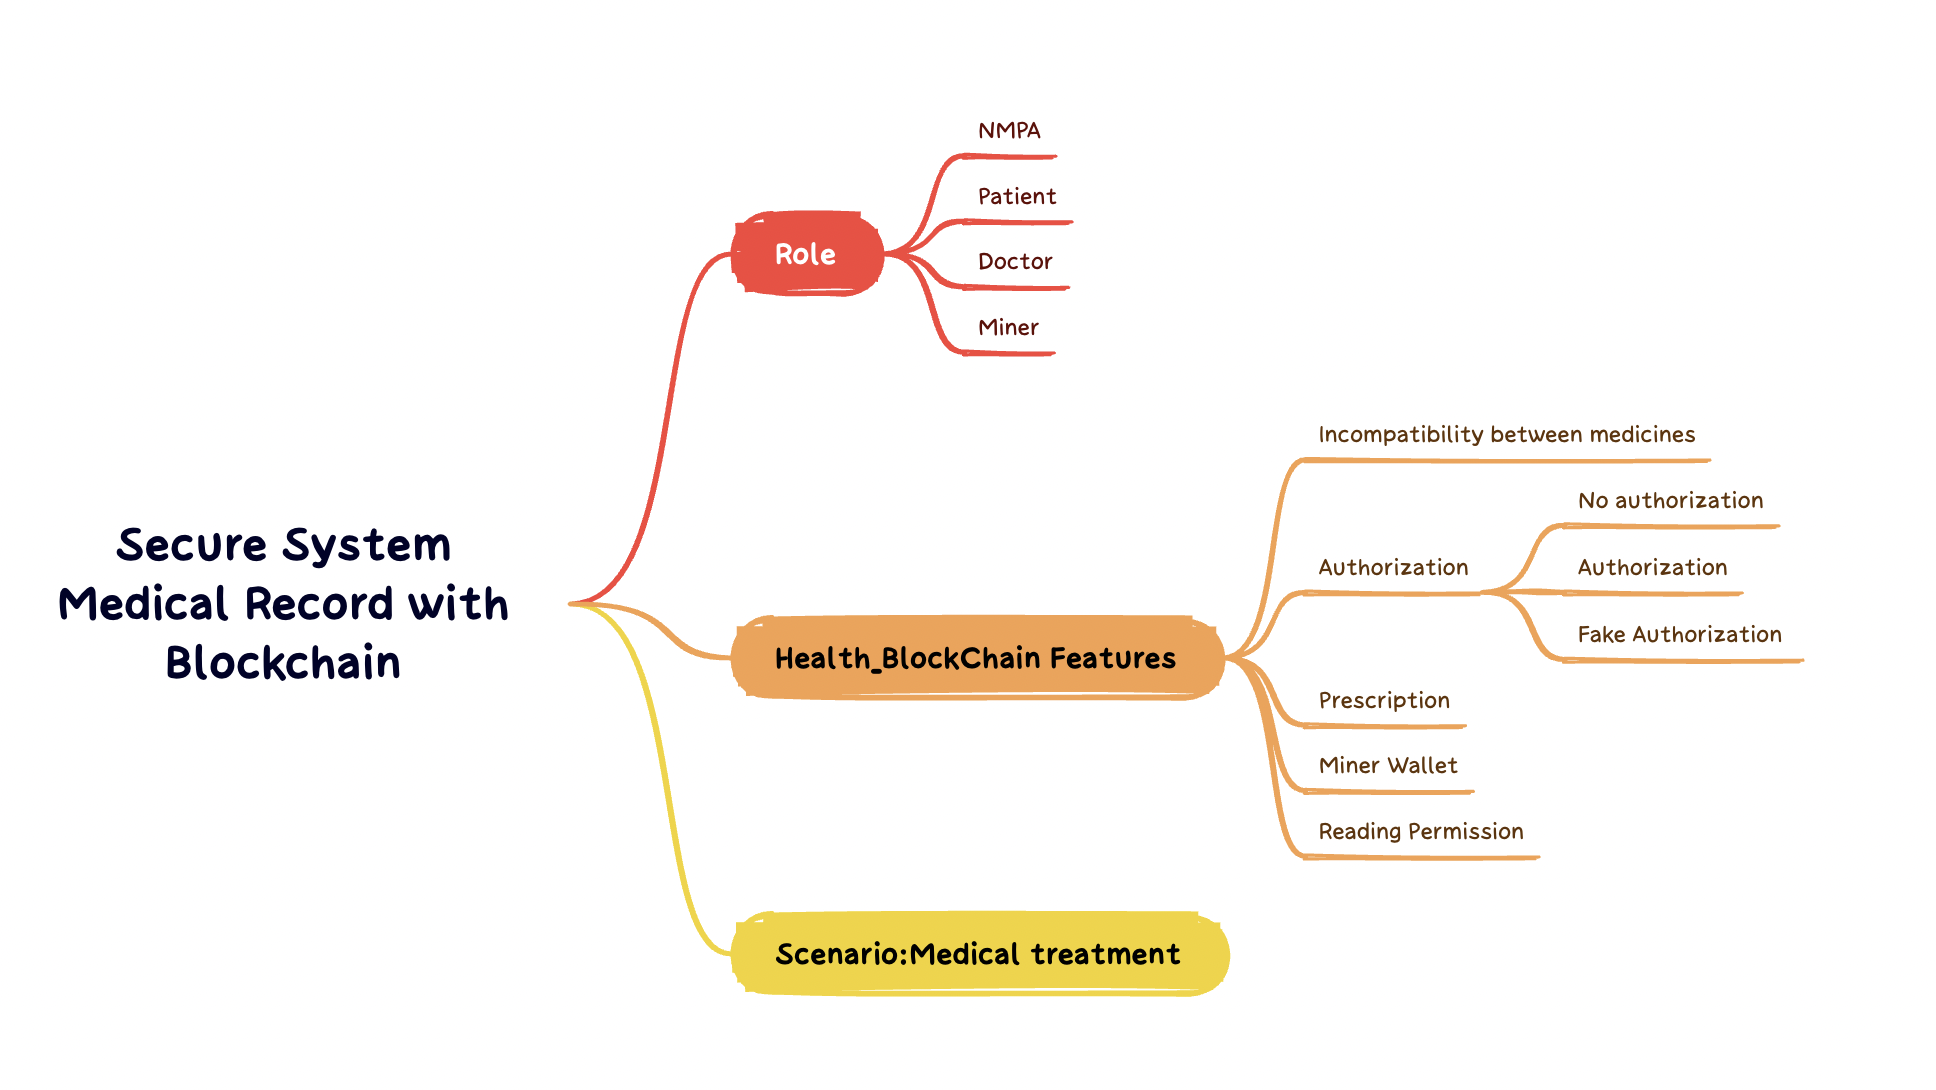

Let's move to the `src` folder where the code is stored, and let's import the libraries that we created and that we are going to use.

In [1]:
cd ../src

/Users/jennyjue/Documents/Secure_System_Medical_Record_With_Blockchain/src


## Loading role Settings

In [2]:
#import the libraries that we created
from patient import Patient
from event import Event
from doctor import Doctor

We have created some virtual patients, doctors, diseases and prescriptions to run this simulation.

In [3]:
# Import patients
from simulations.simulation import Zhao, Qian, Sun, Li, Zhou, Wu, Zheng, Wang, Feng, Chen, Zhu, Wei, Jiang, \
Shen, Han, Yang

# Import doctors
from simulations.simulation import DrZhao, DrQian, DrSun, DrLi, DrZhou, DrWu, DrZheng, DrWang, \
DrFeng, DrChen

# Import diseases
from simulations.simulation import arthritis, asthma, bulimia, celiac, diabetes, ebola, fever, flatulence, \
gastroenteritis, hemorrhoids, insomnia, keratitis, nephritis, neuritis, pneumonia, rhinitis 

# Import prescriptions
from simulations.simulation import prescription_1, prescription_2, prescription_3, prescription_4, prescription_5, \
prescription_6, prescription_7, prescription_8, prescription_9, prescription_10, prescription_11, prescription_12, \
prescription_13, prescription_14, prescription_15

Next step: let's import all the functions that patients and doctors will have at their disposal.

In [4]:
from utils import get_block, get_chain, add_event, load_private_key, verify, get_chain_size

## Scenario : Medical treatment

### Part Ⅰ：
### It shows that the blockchain has tamper-proof and patient privacy protection functions.

Let's consider patient Zhao. He has never had any medical issue in her life, so his blockchain only has the genesis block. 

One day, Zhao meets doctor Qian, and the doctor certifies that Zhao has contracted asthma disease.

Asthma disease has to be added to Zhao's blockchain. Zhao <font color = blue>gives his temporary key </font> to doctor Qian, who will use it to do it.

In [6]:
key = load_private_key('../private_keys/P-123MU_temporary.pem')

In [7]:
add_event(doctor=DrQian, event=asthma, patient=Zhao, key=key)

asthma disease added successfully to patient P-123MU
Temporary keys have been refreshed. Old keys have been destroyed and will not work.


### Verify:
### As we can see, the temporary key has been refreshed. If the doctor <font color = blue> tries to use the same key </font>to check Zhao's blockchain, he will get an error.

In [8]:
get_chain(Zhao, key=key)

PermissionError: You do not have access to the BlockChain of this patient.

In [11]:
import warnings
warnings.filterwarnings("ignore")

If Zhao <mark> gives the new temporary key to the doctor, then he will be able to check his blockchain.

In [12]:
key = load_private_key('../private_keys/P-123MU_temporary.pem')
get_chain(Zhao, key=key)

Temporary keys have been refreshed. Old keys have been destroyed and will not work.


,Name,Doctor,Timestamp,Event,Kind,Previous hash,Hash
Index,,,,,,,
0,P-123MU,None,2022-11-22 05:50:23.667611,None,None,0000000000000000000000000000000000000000000000...,42d21f174320257d6a42b60c7b5260a8360db21f565a5a...
1,P-123MU,D-Y567UK,2022-11-22 05:54:19.155680,disease,asthma,42d21f174320257d6a42b60c7b5260a8360db21f565a5a...,ca7b6b31d5e052037a2429436c22ee8cedc452fdfe175b...


Again, the keys <font color=blue>have been refreshed </font> and the old ones <font color=blue>cannot be used</font>. What the function `get_chain` returned is Zhao's blockchain. We can see that the event "asthma disease" has now been added.
We can also see how the blockchain of asthma disease and the blockchain of doctor Qian have been updated.

In [13]:
get_chain(asthma)

,Name,Patient,Doctor,Timestamp,Previous hash,Hash
Index,,,,,,
0,asthma,None,None,2022-11-22 05:50:25.670513,0000000000000000000000000000000000000000000000...,80647e6f7943b61f11f2009123c50bd78d1c8f84a47a55...
1,asthma,P-123MU,D-Y567UK,2022-11-22 05:54:19.155760,80647e6f7943b61f11f2009123c50bd78d1c8f84a47a55...,a54ef8410f9179fbedce321ca4879f526a615543fc11f3...


In [14]:
get_chain(DrQian)

,Name,Patient,Timestamp,Event,Kind,Previous hash,Hash
Index,,,,,,,
0,D-Y567UK,None,2022-11-22 05:50:25.670947,None,None,0000000000000000000000000000000000000000000000...,7616202b1f046254074ba07e5f7a82aef97577634a0825...
1,D-Y567UK,P-123MU,2022-11-22 05:54:19.155799,disease,asthma,7616202b1f046254074ba07e5f7a82aef97577634a0825...,7b31ad55758c29f3955e2ece3d3d4e33d2ab83ec6d8c61...


In [15]:
asthma.incompatibilities

['drug_15']

### Part Ⅱ：
### Prevent doctors from prescribing incompatible medicines under the premise of protecting patient privacy

One day, Zhao catches a cough. He meets another doctor, doctor Sun, who does not know (or does not remember) that He has asthma disease (or does not remember that a certain drug is not compatible with that disease).

Doctor Sun tries to <MARK>make a prescription for drug_15 to Ann (prescription_15), but drug_15 is not compatible with her asthma disease. The blockchain knows that and will throw an error, preventing the mistake.

In [16]:
key = load_private_key('../private_keys/P-123MU_temporary.pem')
add_event(doctor=DrSun, event=prescription_15, patient=Zhao, key=key)

IncompatibilityError: Past event asthma is not compatible with drug_15 prescription

Doctor Sun will then prescribe a different medicine, for example drug_7, which is compatible with asthma disease.

In [17]:
key = load_private_key('../private_keys/P-123MU_temporary.pem')
add_event(doctor=DrSun, event=prescription_2, patient=Zhao, key=key)

drug_2 prescription added successfully to patient P-123MU
Temporary keys have been refreshed. Old keys have been destroyed and will not work.


Let's have a look at Zhao's blockchain now.

In [18]:
key = load_private_key('../private_keys/P-123MU_temporary.pem')
get_chain(Zhao, key=key)

Temporary keys have been refreshed. Old keys have been destroyed and will not work.


,Name,Doctor,Timestamp,Event,Kind,Previous hash,Hash
Index,,,,,,,
0,P-123MU,None,2022-11-22 05:50:23.667611,None,None,0000000000000000000000000000000000000000000000...,42d21f174320257d6a42b60c7b5260a8360db21f565a5a...
1,P-123MU,D-Y567UK,2022-11-22 05:54:19.155680,disease,asthma,42d21f174320257d6a42b60c7b5260a8360db21f565a5a...,ca7b6b31d5e052037a2429436c22ee8cedc452fdfe175b...
2,P-123MU,D-K661TC,2022-11-22 06:14:36.800576,prescription,drug_2,ca7b6b31d5e052037a2429436c22ee8cedc452fdfe175b...,5203593c8d28f96a2e85adf18152ecd73cd25a30c927c0...


## Verify:

Everything has been stored correctly. We can verify that the chain is not corrupted by running the appropriate function.

In [19]:
verify(Zhao)

(True, 'The BlockChain is not corrupted.')

One last thing we can do is, for example check how many people in the world have contracted celiac disease.

In [20]:
get_chain_size(asthma)

1

Only one person (Zhao) has asthma disease. Let's suppose that another person, say Li, contracts asthma disease (this event will be certified by doctor Zhou). We will see that the `get_chain_size` will print 2.

In [21]:
key = load_private_key('../private_keys/P-372GE_temporary.pem')
add_event(doctor=DrZhou, event=asthma, patient=Li, key=key)

asthma disease added successfully to patient P-372GE
Temporary keys have been refreshed. Old keys have been destroyed and will not work.


In [22]:
get_chain_size(asthma)

2

## Prevent patients from self-mining

It is worth noting that, if a patient tries to mine blocks of his or her own blockchain, he or she will get an error.

This time, patient Li will <mark>try to add diabetes to his chain, using his permanent key.

In [23]:
permanent_key = load_private_key('../private_keys/P-372GE_permanent.pem')

In [24]:
add_event(doctor=Li, event=fever, patient=Li, key=permanent_key)

PermissionError: Only doctors can add events.

However, as we mentioned above, the permanent key is never destroyed, and any patient can use it to check his health blockchain any time he or she wants. Now Zhao uses his permanent key to check his blockchain.

In [25]:
permanent_key = load_private_key('../private_keys/P-123MU_permanent.pem')

In [26]:
get_chain(Zhao, key=permanent_key)

Temporary keys have been refreshed. Old keys have been destroyed and will not work.


,Name,Doctor,Timestamp,Event,Kind,Previous hash,Hash
Index,,,,,,,
0,P-123MU,None,2022-11-22 05:50:23.667611,None,None,0000000000000000000000000000000000000000000000...,42d21f174320257d6a42b60c7b5260a8360db21f565a5a...
1,P-123MU,D-Y567UK,2022-11-22 05:54:19.155680,disease,asthma,42d21f174320257d6a42b60c7b5260a8360db21f565a5a...,ca7b6b31d5e052037a2429436c22ee8cedc452fdfe175b...
2,P-123MU,D-K661TC,2022-11-22 06:14:36.800576,prescription,drug_2,ca7b6b31d5e052037a2429436c22ee8cedc452fdfe175b...,5203593c8d28f96a2e85adf18152ecd73cd25a30c927c0...


In [27]:
get_chain(Zhao, key=permanent_key)

Temporary keys have been refreshed. Old keys have been destroyed and will not work.


,Name,Doctor,Timestamp,Event,Kind,Previous hash,Hash
Index,,,,,,,
0,P-123MU,None,2022-11-22 05:50:23.667611,None,None,0000000000000000000000000000000000000000000000...,42d21f174320257d6a42b60c7b5260a8360db21f565a5a...
1,P-123MU,D-Y567UK,2022-11-22 05:54:19.155680,disease,asthma,42d21f174320257d6a42b60c7b5260a8360db21f565a5a...,ca7b6b31d5e052037a2429436c22ee8cedc452fdfe175b...
2,P-123MU,D-K661TC,2022-11-22 06:14:36.800576,prescription,drug_2,ca7b6b31d5e052037a2429436c22ee8cedc452fdfe175b...,5203593c8d28f96a2e85adf18152ecd73cd25a30c927c0...
